## KKBox Benchmark (PyCox Preprocessing)

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
import numpy as np
import pandas as pd

os.getenv("PYCOX_DATA_DIR")

'../data/kkbox'

In [1]:
from pycox.datasets import kkbox_v1

kkbox_v1._path_dir.mkdir(exist_ok=True)

In [2]:
if not kkbox_v1.path_train.exists():    
    kkbox_v1._csv_to_feather_with_types()
    kkbox_v1._make_survival_data()
    kkbox_v1._make_survival_covariates()
    kkbox_v1._make_train_test_split()

In [3]:
train = kkbox_v1.read_df(subset="train")
train

,msno,event,n_prev_churns,log_days_between_subs,duration,log_days_since_reg_init,log_payment_plan_days,log_plan_list_price,log_actual_amount_paid,is_auto_renew,is_cancel,city,gender,registered_via,age_at_start,strange_age,nan_days_since_reg_init,no_prev_churns
0,khTQl3B7k10IA9zPMpm5jMc4VxHKh+mo8ngDaos2Od4=,1.0,0.0,0.0,7.0,0.000000,2.079442,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
1,2jy816+2+7/UYg7RNhP1PnifBmP9CL0/3ioqGBg/jrc=,0.0,0.0,0.0,694.0,4.262680,3.433987,5.017280,5.017280,0.0,0.0,15,NaN,9,0.0,1.0,0.0,1.0
2,yTnAG21OBNMRG6yL2ovgHG5zJ2GFTRpRZDVP04dqsKY=,1.0,0.0,0.0,61.0,0.000000,3.433987,5.010635,0.000000,1.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
3,PU3abZF43MOIGUKry3qu9vetFKi1d7BlJ8//Kk4zIHY=,0.0,0.0,0.0,58.0,0.693147,3.433987,4.615121,4.615121,1.0,0.0,1,NaN,7,-0.0,1.0,0.0,1.0
4,h7n6QC+6LkEsVtWHknIABBGN87SSMhu1cCEYq0f5lxw=,1.0,0.0,0.0,30.0,0.693147,3.433987,5.010635,0.000000,1.0,0.0,13,female,7,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786353,v8HEZ52iJ1vMcy6s4nA6fdmJ4GbJuRdPyk4YP9J8yx4=,1.0,0.0,0.0,7.0,0.000000,2.079442,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
1786354,h8Ui90iYczbI7Z4ezCl6AQ6kKjsz0kF+2vt7jrDCjV8=,0.0,0.0,0.0,476.0,0.693147,2.397895,0.000000,0.000000,0.0,0.0,4,female,4,27.0,0.0,0.0,1.0
1786355,7k3u/jaF58rUPcqsxLVizRAZgh5HbZB3UR0tHsC86qY=,0.0,0.0,0.0,273.0,6.228511,3.433987,5.198497,5.198497,0.0,0.0,12,male,3,22.0,0.0,0.0,1.0
1786356,qXE+j9MNdtPUbcCy2pyKLzAWZ1LztDukUa9RKmFfDUE=,1.0,0.0,0.0,59.0,7.101676,3.433987,5.010635,5.010635,1.0,0.0,14,female,9,27.0,0.0,0.0,1.0


In [4]:
val = kkbox_v1.read_df(subset="val")
val

,msno,event,n_prev_churns,log_days_between_subs,duration,log_days_since_reg_init,log_payment_plan_days,log_plan_list_price,log_actual_amount_paid,is_auto_renew,is_cancel,city,gender,registered_via,age_at_start,strange_age,nan_days_since_reg_init,no_prev_churns
0,ySeDlgqnyg7s6GysoIT6PA4dxKUtf7nNRCwc1rM9KHI=,1.0,0.0,0.000000,413.0,6.037871,6.018593,7.489412,7.489412,0.0,0.0,8,female,9,39.0,0.0,0.0,1.0
1,V8P2TtMajBFvu73ylPvuuL+TZt4gnJga4/2eP7zfcLg=,1.0,0.0,0.000000,29.0,0.000000,3.433987,5.010635,0.000000,1.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
2,TBph+97zCjGwbI2nUxuWyOp2qpWqVn9k1iR4uaXEG7k=,0.0,0.0,0.000000,791.0,7.178545,3.433987,4.867535,4.867535,1.0,0.0,1,NaN,7,0.0,1.0,0.0,1.0
3,4+I6SwJRG6DipLKRrJtu4TivQqfEqUUs+FxK+dvo1wI=,1.0,0.0,0.000000,14.0,0.000000,3.433987,5.010635,0.000000,1.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
4,S746huKfehQhDU9EHDppF5hnFRkNCBTilQT1l5XXibo=,1.0,0.0,0.000000,673.0,7.280697,3.465736,5.010635,5.010635,1.0,0.0,5,male,9,39.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198635,YvRQdn78R7qa5uC4p/N4m+iJmcQIEJQmvtB3DLuER3U=,1.0,0.0,0.000000,3.0,6.216606,5.278115,0.000000,0.000000,0.0,0.0,5,female,3,48.0,0.0,0.0,1.0
198636,0TSySc3XgF3BoFN1gmDxssKqARwnE/fUnPQau+6wOgA=,1.0,0.0,0.000000,7.0,0.000000,2.079442,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
198637,t4J50mpx8fCCalbag3FWOem0KblFWMgVKuq7fPwuFLk=,0.0,0.0,0.000000,150.0,0.000000,3.433987,4.867535,4.867535,1.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
198638,7d7OstX9Mt6oIf7lt16ssUiGvmVou1vdolonepYfeY0=,1.0,0.0,0.000000,30.0,5.710427,0.000000,0.000000,5.010635,0.0,0.0,1,NaN,9,0.0,1.0,0.0,1.0


In [5]:
test = kkbox_v1.read_df(subset="test")
test

,msno,event,n_prev_churns,log_days_between_subs,duration,log_days_since_reg_init,log_payment_plan_days,log_plan_list_price,log_actual_amount_paid,is_auto_renew,is_cancel,city,gender,registered_via,age_at_start,strange_age,nan_days_since_reg_init,no_prev_churns
0,O77INmOJUmfNOpkjIKDqUg2mspqVilbeIZNMeA9uSPI=,1.0,0.0,0.0,15.0,0.693147,2.708050,0.000000,0.000000,0.0,0.0,1,NaN,9,0.0,1.0,0.0,1.0
1,i7Rxt2tQegmPFrnn7gkeETBhWCAJ5TSuo5/hlp/nlWk=,1.0,0.0,0.0,410.0,3.583519,6.018593,7.489412,7.489412,0.0,0.0,13,male,3,49.0,0.0,0.0,1.0
2,y6oqfjpx42uMgAhqw75FzQWfPE/2JKe0TkLfHyCcdIY=,1.0,0.0,0.0,410.0,7.852439,3.465736,5.010635,5.010635,1.0,0.0,22,male,9,29.0,0.0,0.0,1.0
3,y6oqfjpx42uMgAhqw75FzQWfPE/2JKe0TkLfHyCcdIY=,1.0,1.0,0.0,138.0,8.045268,3.433987,5.010635,5.010635,1.0,0.0,22,male,9,30.0,0.0,0.0,0.0
4,ovOeCMa24deYRZkxKq9DLVCg0HYxFH3UC0kvluRr7hg=,1.0,0.0,0.0,393.0,0.693147,5.278115,6.796824,6.796824,0.0,0.0,5,female,9,20.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661743,oDvTbXiI3lFVVP7FwP5S7902FHg43QxywIaL+ph362U=,1.0,0.0,0.0,394.0,3.044523,3.465736,5.010635,5.010635,1.0,0.0,5,female,3,24.0,0.0,0.0,1.0
661744,/gHyWzlbA/hSJUPaOPySmPPZg77knoIyRFxmnbVdfq8=,1.0,0.0,0.0,28.0,0.000000,3.433987,5.010635,0.000000,1.0,0.0,NaN,NaN,NaN,-1.0,0.0,1.0,1.0
661745,rvOvNfogF1rvCJ42ZHPmgflxaXm2Ix+vxizd/A4MDKM=,1.0,0.0,0.0,3.0,4.672829,2.079442,0.000000,0.000000,0.0,0.0,1,NaN,9,0.0,1.0,0.0,1.0
661746,QjyVGBDNTHLZq+jSGCnyZNmDNmOygedtzDvbbik1wAQ=,1.0,0.0,0.0,440.0,7.639642,6.018593,7.489412,7.489412,0.0,0.0,13,female,9,46.0,0.0,0.0,1.0


In [6]:
train.msno.nunique()

1582202

In [7]:
train.isna().sum()

msno                            0
event                           0
n_prev_churns                   0
log_days_between_subs           0
duration                        0
log_days_since_reg_init         0
log_payment_plan_days           0
log_plan_list_price             0
log_actual_amount_paid          0
is_auto_renew                   0
is_cancel                       0
city                       290209
gender                     990092
registered_via             290209
age_at_start                    0
strange_age                     0
nan_days_since_reg_init         0
no_prev_churns                  0
dtype: int64

In [8]:
def replace_nan(df):
    df["gender"] = df["gender"].astype(str)
    gender_map = dict(zip(df["gender"].unique(), range(df["gender"].nunique())))
    df["gender"] = df["gender"].map(gender_map)
    
    df["city"] = df["city"].astype(str).replace("nan", -1).astype(int)
    
    df["registered_via"] = df["registered_via"].astype(str).replace("nan", -1).astype(int)

In [9]:
for df in [train, test, val]:
    replace_nan(df)

In [10]:
from sksurv.datasets import get_x_y

# remove ID from covariates
cols = list(set(train.columns) - {"msno"})

X_train, y_train = get_x_y(train[cols], ("event", "duration"), pos_label=1)
X_test, y_test = get_x_y(test[cols], ("event", "duration"), pos_label=1)
X_val, y_val = get_x_y(val[cols], ("event", "duration"), pos_label=1)

## Fit some baselines models

In [11]:
y_time = np.hstack([y_train["duration"], y_test["duration"], y_val["duration"]])
lower, upper = np.percentile(y_time, [10, 90])
times = np.linspace(lower, upper, 100)

NameError: name 'np' is not defined

In [ ]:
import pickle
from pathlib import Path

from sksurv.metrics import (
    brier_score,
    integrated_brier_score,
    cumulative_dynamic_auc,
    concordance_index_censored,
    concordance_index_ipcw,
)


def get_scores(model, y_train, X_test, y_test, times):

    survival_probs = model.predict_survival_function(X_test, return_array=True)
    #cumulative_hazards = model.predict_cumulative_hazard_function(X_test, return_array=True)
    #risk_estimate = cumulative_hazards.sum(axis=1)

    _, brier_scores = brier_score(y_train, y_test, survival_probs, times)
    ibs = integrated_brier_score(y_train, y_test, survival_probs, times)
    
    #auc, mean_auc = cumulative_dynamic_auc(y_train, y_test, cumulative_hazards, times)
    
    #c_index = concordance_index_censored(y_test["event"], y_test["duration"], risk_estimate)[0]
    #c_index_ipcw = concordance_index_ipcw(y_train, y_test, risk_estimate)[0]
    
    return dict(
        brier_scores=brier_scores,
        ibs=ibs,
        times=times,
        survival_probs=survival_probs,
        #auc=auc,
        #mean_auc=mean_auc,
        #c_index=c_index,
        #c_index_ipcw=c_index_ipcw,
    )


def save_scores(name, scores):
    path = _make_path(name, create_dir=True)
    pickle.dump(scores, open(path, "wb+"))

    
def load_scores(name):
    path = _make_path(name, create_dir=False)
    return pickle.load(open(path, "rb"))
    
    
def _make_path(name, create_dir):
    path = Path(os.getenv("PYCOX_DATA_DIR")) / "kkbox_v1" / "results"
    if create_dir:
        path.mkdir(exist_ok=True, parents=True)
    return path / f"{name}.pkl"

### RandomSurvivalForest

In [61]:
%%time

from sksurv.ensemble import RandomSurvivalForest

rf_params = dict(
    max_leaf_nodes=100,
    min_samples_leaf=100,
    n_estimators=30,
    max_features=8,
    n_jobs=4,
)
subsample = 0.05
n_sample = max(1, int(X_train.shape[0] * subsample))
rf = RandomSurvivalForest(**rf_params).fit(
    X_train.values[:n_sample],
    y_train[:n_sample],
)

CPU times: user 16min 45s, sys: 5.48 s, total: 16min 51s
Wall time: 4min 36s


In [101]:
def get_scores_skurv(model, y_train, X_test, y_test, times):
    
    step_funcs = rf.predict_survival_function(X_test, return_array=False)
    survival_probs = np.vstack([step_func(times) for step_func in step_funcs])
    
    _, brier_scores = brier_score(y_train, y_test, survival_probs, times)
    ibs = integrated_brier_score(y_train, y_test, survival_probs, times)
    
    return dict(
        times=times,
        brier_scores=brier_scores,
        ibs=ibs,
        survival_probs=survival_probs,
    )

In [103]:
%%time

scores = get_scores_skurv(rf, y_train[:n_sample], X_test.values[:100_000], y_test[:100_000], times)
save_scores("random_survival_forest", scores)
scores["ibs"]

CPU times: user 21.2 s, sys: 17.3 s, total: 38.4 s
Wall time: 16 s


0.1067206056417988

**Comments**
- This is one of the most widely used scikit-survival models, and it performs very slowly due to its logrank criterion.
- Its IBS is actually slightly below our NaiveForestGridBC.

### MetaGridBC

In [105]:
%%time

from sklearn.linear_model import LogisticRegression

from models.meta_grid_bc import MetaGridBC

lr_params = dict(
    C=1e-3, max_iter=500
)
meta_grid_bc = MetaGridBC(
    LogisticRegression(**lr_params),
    verbose=False,
    n_jobs=4
).fit(X_train.values, y_train, time_bins=times)

/Users/vincentmaladiere/mambaforge/envs/skurvival/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: user 9.5 s, sys: 4.43 s, total: 13.9 s
Wall time: 4min 1s


In [106]:
%%time

scores = get_scores(meta_grid_bc, y_train, X_test.values, y_test, times)
save_scores("meta_grid_bc", scores)
scores["ibs"]

CPU times: user 7.96 s, sys: 2.68 s, total: 10.6 s
Wall time: 11.5 s


0.12189194788095116

### NaiveForestGridBC: RandomForestRegressor + MetaGridBC

In [108]:
%%time

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from models.tree_transformer import TreeTransformer
from models.meta_grid_bc import MetaGridBC

rf_params = dict(
    min_samples_leaf=100,
    max_leaf_nodes=100,
    n_estimators=30,
    max_features=8,
    n_jobs=4,
    verbose=False,
)
lr_params = dict(
    C=1e-3, max_iter=500
)
forest_grid_bc = make_pipeline(
    TreeTransformer(
        RandomForestRegressor(**rf_params)
    ),  # ignores censoring
    MetaGridBC(
        LogisticRegression(**lr_params),
        verbose=False,
        n_jobs=4
    ),
).fit(X_train.values, y_train, metagridbc__time_bins=times)

CPU times: user 1min 51s, sys: 8.75 s, total: 2min
Wall time: 2min 10s


In [139]:
forest_grid_bc

Pipeline(steps=[('treetransformer',
                 TreeTransformer(base_estimator=RandomForestRegressor(max_features=8,
                                                                      max_leaf_nodes=100,
                                                                      min_samples_leaf=100,
                                                                      n_estimators=30,
                                                                      n_jobs=4,
                                                                      verbose=True))),
                ('metagridbc',
                 MetaGridBC(classifier=LogisticRegression(C=0.001,
                                                          max_iter=500),
                            n_jobs=4, verbose=True))])

In [109]:
%%time

scores = get_scores(forest_grid_bc, y_train, X_test, y_test, times)
save_scores("forest_grid_bc", scores)
scores["ibs"]

/Users/vincentmaladiere/mambaforge/envs/skurvival/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


CPU times: user 11.1 s, sys: 3.14 s, total: 14.3 s
Wall time: 17.9 s


0.10580742949968416

### SurvivalForestGridBC: RandomSurvivalForest + MetaGridBC

In [36]:
%%time

from sksurv.ensemble import RandomSurvivalForest

rf_params = dict(
    min_samples_leaf=100,
    max_leaf_nodes=100,
    n_estimators=30,
    max_features=8,
    n_jobs=4,
    verbose=True,
)
lr_params = dict(
    C=1e-3, max_iter=500
)
survival_forest_grid_bc = make_pipeline(
    TreeTransformer(
        RandomSurvivalForest(**rf_params),
        handle_survival_target=True,  # activate censoring (fit on full y instead on y_duration)
        subsample=.05,  # subsample to fit the RandomSurvivalForest faster
    ),  
    MetaGridBC(
        LogisticRegression(**lr_params),
        verbose=True,
        n_jobs=4,
    ),
).fit(X_train.values, y_train, metagridbc__time_bins=times)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  4.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   46.7s
/Users/vincentmaladiere/mambaforge/envs/skurvival/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.1min finished


CPU times: user 19min 11s, sys: 10.5 s, total: 19min 21s
Wall time: 6min 4s


In [37]:
%%time

scores = get_scores(survival_forest_grid_bc, y_train, X_test.values, y_test, times)
save_scores("survival_forest_grid_bc", scores)
scores["ibs"]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.3s finished


CPU times: user 9.4 s, sys: 2.24 s, total: 11.6 s
Wall time: 13.6 s


0.10674772794993534

TODO: Cross val to see if that slight gap sticks

### NaiveForestKaplanNeighbors: RandomForestRegressor + KaplanNeighbors

In [70]:
%%time

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

from models.kaplan_neighbors import KaplanNeighbors
from models.tree_transformer import TreeTransformer

rf_params = dict(
    min_samples_leaf=100,
    max_leaf_nodes=100,
    n_estimators=30,
    max_features=8,
    n_jobs=4,
    verbose=1,
)
neighbors_params = dict(
    n_neighbors=30,
    n_jobs=4,
    metric="cosine", # TODO test cosine
)

naive_forest_kn = make_pipeline(
    TreeTransformer(
        RandomForestRegressor(**rf_params),
    ),
    KaplanNeighbors(neighbors_params),
)
naive_forest_kn.fit(X_train.values, y_train, kaplanneighbors__time_bins=times)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   23.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.7s finished


CPU times: user 1min 35s, sys: 1.67 s, total: 1min 36s
Wall time: 32.1 s


Pipeline(steps=[('treetransformer',
                 TreeTransformer(base_estimator=RandomForestRegressor(max_features=8,
                                                                      max_leaf_nodes=100,
                                                                      min_samples_leaf=100,
                                                                      n_estimators=30,
                                                                      n_jobs=4,
                                                                      verbose=1))),
                ('kaplanneighbors',
                 KaplanNeighbors(neighbors_params={'metric': 'cosine',
                                                   'n_jobs': 4,
                                                   'n_neighbors': 30}))])

In [71]:
%%time

scores = get_scores(naive_forest_kn, y_train, X_test.values[:1000], y_test[:1000], times)
save_scores("naive_forest_kn_cosine", scores)
scores["ibs"]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.0s finished


CPU times: user 1min 46s, sys: 28 s, total: 2min 14s
Wall time: 1min 3s


0.10609362006519708

### NaiveKaplanTree: DecisionTreeRegressor + KaplanTree

In [110]:
%%time

from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

from models.kaplan_tree import KaplanTree
from models.tree_transformer import TreeTransformer

tree_params = dict(
    min_samples_leaf=100,
    max_leaf_nodes=100,
)

naive_kaplan_tree = make_pipeline(
    TreeTransformer(
        DecisionTreeRegressor(**tree_params),
    ),
    KaplanTree(),  # Kaplan Meier is a non-parametric model
)
naive_kaplan_tree.fit(X_train.values, y_train, kaplantree__time_bins=times)

CPU times: user 19 s, sys: 900 ms, total: 19.9 s
Wall time: 21 s


Pipeline(steps=[('treetransformer',
                 TreeTransformer(base_estimator=DecisionTreeRegressor(max_leaf_nodes=100,
                                                                      min_samples_leaf=100))),
                ('kaplantree', KaplanTree())])

In [111]:
%%time

scores = get_scores(naive_kaplan_tree, y_train, X_test.values, y_test, times)
save_scores("naive_kaplan_tree", scores)
scores["ibs"]

CPU times: user 11.3 s, sys: 984 ms, total: 12.3 s
Wall time: 12.6 s


0.1064595237686656

## XGBSE models

In [16]:
%%time

from xgbse import XGBSEDebiasedBCE

PARAMS_TREE_COX = {
    'objective': 'survival:cox',
    'eval_metric': 'cox-nloglik',
    'tree_method': 'hist',
    'max_depth': 10,
    'booster': 'dart',
    'subsample': 1.0,
    'min_child_weight': 50,
    'colsample_bynode': 1.0,
    'verbosity': 1,
    'nthread': 4,
}
xgbse_bce_cox = XGBSEDebiasedBCE(PARAMS_TREE_COX, n_jobs=4).fit(
    X_train,
    y_train,
    time_bins=times,
    num_boost_round=30,  # instead of 1000
    verbose_eval=5,  # print eval every 5 rounds
)

CPU times: user 2min 9s, sys: 12.3 s, total: 2min 22s
Wall time: 2min 17s


In [23]:
def get_scores_xgbse(model, y_train, X_test, y_test, times):
    survival_probs = model.predict(X_test, return_interval_probs=False)  # return survival probs instead of cumulative hazard
    
    _, brier_scores = brier_score(y_train, y_test, survival_probs.values, times)
    ibs = integrated_brier_score(y_train, y_test, survival_probs.values, times)
    
    return dict(
        times=times,
        brier_scores=brier_scores,
        ibs=ibs,
        survival_probs=survival_probs,
    )

In [25]:
%%time

scores = get_scores_xgbse(xgbse_bce_cox, y_train, X_test, y_test, times)
save_scores("xgbse_bce_cox", scores)
print(scores["ibs"])

0.10669334732608947
CPU times: user 14.1 s, sys: 5.07 s, total: 19.2 s
Wall time: 19.6 s


**Comments**
- Direct contender to our `ForestGridBC` (we use xgbse `_build_multi_task_targets` which could be optimize, or we could vendor it at the very least).
- Default `num_boost_round` (aka `n_estimators`) is 1000, which seems high.
- Default `PARAMS_LR` is `{"C": 1e-3, "max_iter": 500}`, the regularization is high as well.
- Booster is `"dart"` but `rate_drop` is at zero (default value, according to [xgboost documentation](https://xgboost.readthedocs.io/en/stable/parameter.html#additional-parameters-for-dart-booster-booster-dart)), hence there is no dropout.

In [26]:
%%time

PARAMS_TREE_AFT = {
    "objective": "survival:aft",
    "eval_metric": "aft-nloglik",
    "aft_loss_distribution": "normal",
    "aft_loss_distribution_scale": 1,
    "tree_method": "hist",
    "learning_rate": 5e-2,
    "max_depth": 8,
    "booster": "dart",
    "subsample": 0.5,
    "min_child_weight": 50,
    "colsample_bynode": 0.5,
}
xgbse_bce_aft = XGBSEDebiasedBCE(PARAMS_TREE_AFT, n_jobs=4).fit(
    X_train,
    y_train,
    time_bins=times,
    num_boost_round=30,
    # validation_data=[(X_val, y_val)],
    # verbose_eval=5,
)

/Users/vincentmaladiere/mambaforge/envs/skurvival/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: user 2min 11s, sys: 48 s, total: 2min 59s
Wall time: 1min 54s


In [28]:
%%time

scores = get_scores_xgbse(xgbse_bce_aft, y_train, X_test, y_test, times)
save_scores("xgbse_bce_aft", scores)
print(scores["ibs"])

0.10594601562721337
CPU times: user 12.3 s, sys: 5.49 s, total: 17.8 s
Wall time: 18.4 s


**Comments**
- This model uses an AFT method by default, perform slightly better than its cox cousin here.

## Scores

In [37]:
import os
import pandas as pd
from pathlib import Path
import pickle


def get_all_results():
    results_dir = Path(os.getenv("PYCOX_DATA_DIR")) / "kkbox_v1" / "results"
    results = []
    for path in results_dir.iterdir():
        if path.is_file() and path.suffix == ".pkl":
            result = pickle.load(open(path, "rb"))
            model = path.name.split(".")[0]
            result["model"] = model
            results.append(result)
    return pd.DataFrame(results).sort_values("ibs").reset_index(drop=True)

In [38]:
results = get_all_results()
results[["model", "ibs"]]

,model,ibs
0,forest_grid_bc,0.105807
1,xgbse_bce_aft,0.105946
2,naive_kaplan_tree,0.106460
3,xgbse_bce_cox,0.106693
4,random_survival_forest,0.106721
5,survival_forest_grid_bc,0.106748
6,naive_forest_kn,0.106774
7,meta_grid_bc,0.121892


Models from the [pycox paper](https://jmlr.org/papers/volume20/18-424/18-424.pdf) obtained the following results with the same preprocessing:

<img src="../data/kkbox/kkbox_v1/pycox_paper_table7.png" alt="pycox-table7" style="width: 400px;"/>

In [30]:
pd.DataFrame(
    [
        ["random_survival_forest", {"n_jobs": 4}, "89,317 (5%)", "100,000", "4min 36s", "13.3 s"],
        ["meta_grid_bc", {"n_jobs": 4}, "1,786,358", "661,748", "3min 10s", "9.52 s"],
        ["naive_forest_grid_bc", {"n_jobs": 4}, "1,786,358", "661,748", "1min 42s", "14.2 s"],
        ["survival_forest_grid_bc", {"n_jobs": 4, "subsample": .05}, "1,786,358", "661,748", "6min 4s", "13.6 s"],
        ["naive_forest_kaplan_neighbors", {"n_jobs": 4}, "1,786,358", "1,000", "32.1 s", "1min 3s"],
        ["naive_kaplan_tree", "N/A", "1,786,358", "661,748", "16.6 s", "10.1 s"],
        ["XGBSEDebiased_BCE_cox", {"n_jobs": 4, "objective": "survival:cox"}, "1,786,358", "661,748", "2min 17s", "19.6 s"],
        ["XGBSEDebiased_BCE_aft", {"n_jobs": 4, "objective": "survival:aft"}, "1,786,358", "661,748", "1min 54s", "18.4 s"],
    ],
    columns=["model", "params", "n samples train", "n samples test", "training_duration", "predict_duration"]
)

,model,params,n samples train,n samples test,training_duration,predict_duration
0,random_survival_forest,{'n_jobs': 4},"89,317 (5%)","100,000",4min 36s,13.3 s
1,meta_grid_bc,{'n_jobs': 4},"1,786,358","661,748",3min 10s,9.52 s
2,naive_forest_grid_bc,{'n_jobs': 4},"1,786,358","661,748",1min 42s,14.2 s
3,survival_forest_grid_bc,"{'n_jobs': 4, 'subsample': 0.05}","1,786,358","661,748",6min 4s,13.6 s
4,naive_forest_kaplan_neighbors,{'n_jobs': 4},"1,786,358","1,000",32.1 s,1min 3s
5,naive_kaplan_tree,N/A,"1,786,358","661,748",16.6 s,10.1 s
6,XGBSEDebiased_BCE_cox,"{'n_jobs': 4, 'objective': 'survival:cox'}","1,786,358","661,748",2min 17s,19.6 s
7,XGBSEDebiased_BCE_aft,"{'n_jobs': 4, 'objective': 'survival:aft'}","1,786,358","661,748",1min 54s,18.4 s


All forests are config as follow:

In [131]:
rf_params

{'min_samples_leaf': 100,
 'max_leaf_nodes': 100,
 'n_estimators': 30,
 'max_features': 8,
 'n_jobs': 4,
 'verbose': True}

Cox Boosting trees config, with `num_boost_round = 30`:

In [34]:
PARAMS_TREE_COX

{'objective': 'survival:cox',
 'eval_metric': 'cox-nloglik',
 'tree_method': 'hist',
 'max_depth': 10,
 'booster': 'dart',
 'subsample': 1.0,
 'min_child_weight': 50,
 'colsample_bynode': 1.0,
 'verbosity': 1,
 'nthread': 4}

Aft Boosting trees config, with `num_boost_round = 30`:

In [36]:
PARAMS_TREE_AFT

{'objective': 'survival:aft',
 'eval_metric': 'aft-nloglik',
 'aft_loss_distribution': 'normal',
 'aft_loss_distribution_scale': 1,
 'tree_method': 'hist',
 'learning_rate': 0.05,
 'max_depth': 8,
 'booster': 'dart',
 'subsample': 0.5,
 'min_child_weight': 50,
 'colsample_bynode': 0.5}

And the binary classifiers ("bc") are LogisticRegression with the following config:

In [88]:
lr_params

{'C': 0.001, 'max_iter': 500}

### Brier scores

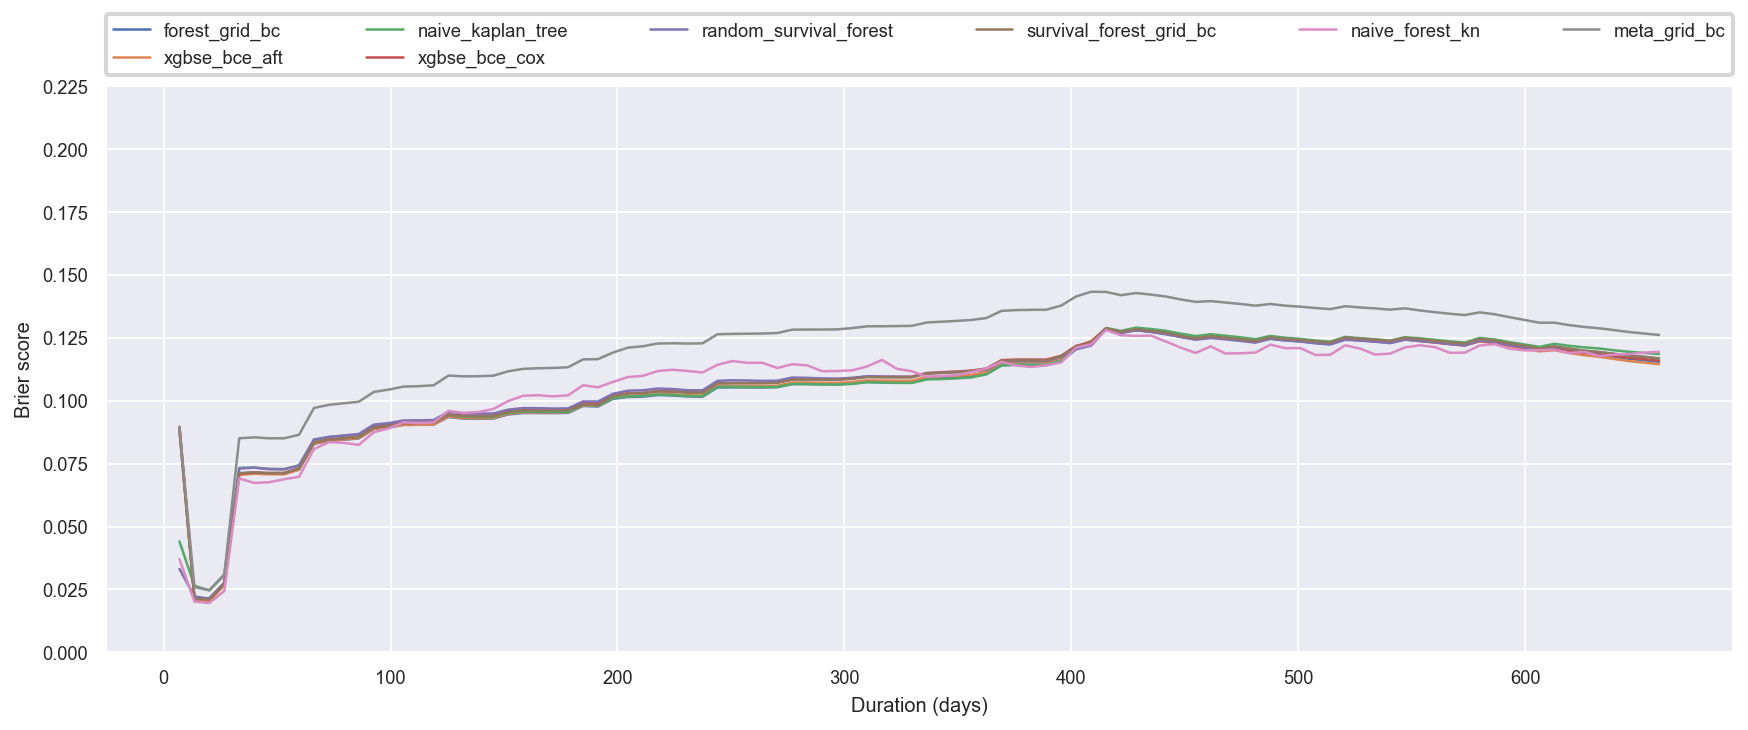

In [40]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

mpl.rcParams['figure.dpi'] = 150
sns.set_theme()
sns.set_context("paper")

cols = results.columns
col_to_idx = dict(zip(cols, range(len(cols))))

fig, ax = plt.subplots(figsize=(14, 5))
for row in results.values:
    ax.plot(
        times,
        row[col_to_idx["brier_scores"]],
        label=row[col_to_idx["model"]],
    )
plt.ylim([0, .225])
plt.xlabel("Duration (days)")
plt.ylabel("Brier score")
legend = plt.legend(
    bbox_to_anchor=(0, 1.02, 1, 0.2),
    loc="lower left",
    mode="expand",
    borderaxespad=0,
    ncol=6,
    facecolor='white',
);
frame = legend.get_frame()
frame.set_linewidth(2)

<img src="../data/kkbox/kkbox_v1/pycox_paper_figure4.png" alt="pycox-table7" style="width: 900px;"/>

### Calibration

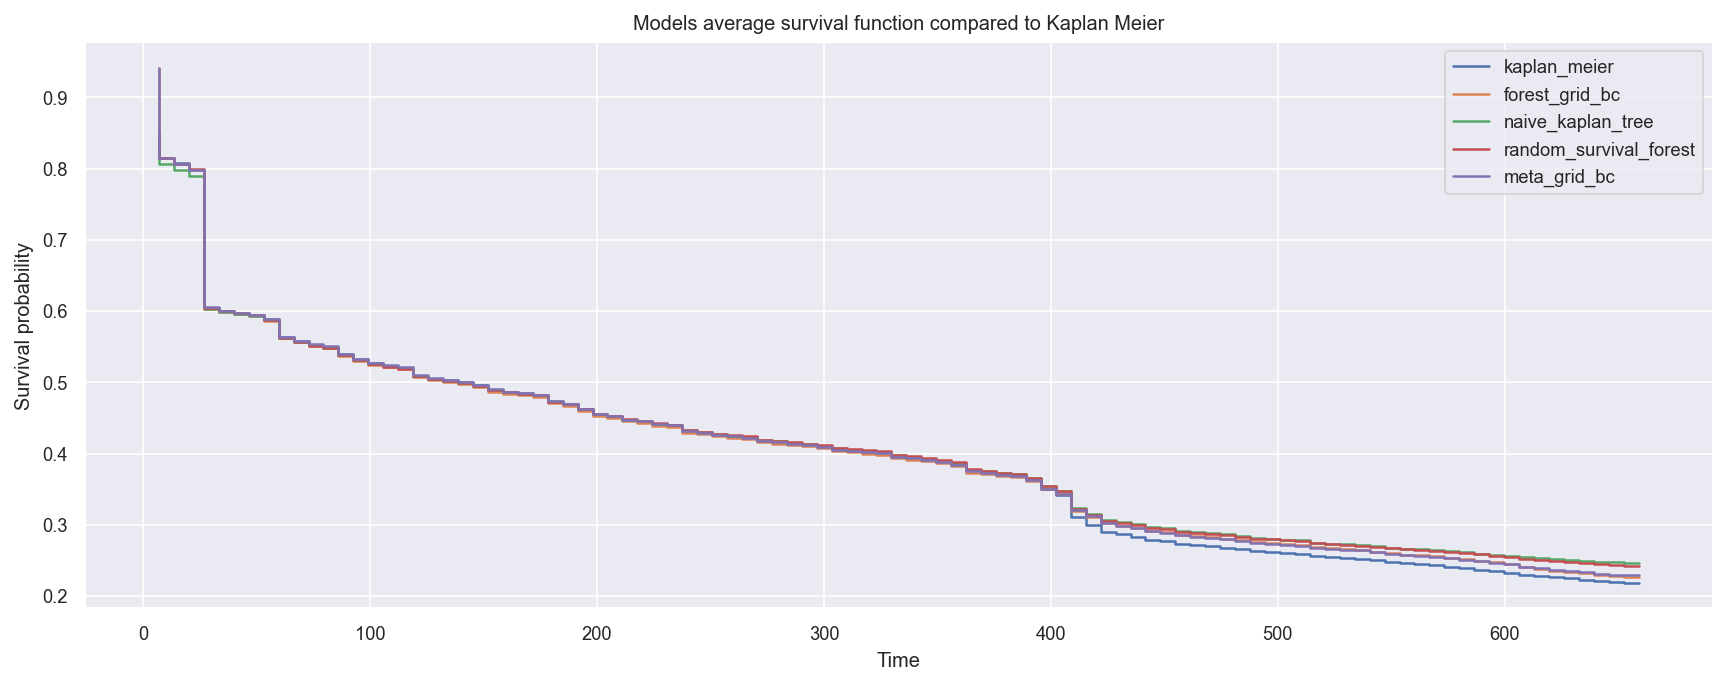

In [136]:
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.tree.tree import StepFunction

km_times, km_values = kaplan_meier_estimator(y_test["event"], y_test["duration"])
km = StepFunction(km_times, km_values)(times)

fig, ax = plt.subplots(figsize=(14, 5))
ax.step(times, km, label="kaplan_meier");

cols = results.columns
col_to_idx = dict(zip(cols, range(len(cols))))
for row in results.values:
    survival_probs = row[col_to_idx["survival_probs"]]
    if getattr(survival_probs, "ndim", False):
        ax.step(times, survival_probs.mean(axis=0), label=row[col_to_idx["model"]])
plt.xlabel("Time")
plt.ylabel("Survival probability")
plt.title("Models average survival function compared to Kaplan Meier")
plt.legend();